# Goals


### Train a classifier using resnet18 on natural-images dataset

### Understand what lies inside resnet18 network

# What is resnet

## Readings on resnet

  1) Points from https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035
    - The core idea of ResNet is introducing a so-called “identity shortcut connection” that skips one or more layers
    - The deeper model should not produce a training error higher than its shallower counterparts.
    - solves the problem of vanishing gradiens as network depth increased - https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257
    
    
 
  2) Points from https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624
    - Won 1st place in the ILSVRC 2015 classification competition with top-5 error rate of 3.57% (An ensemble model)
    - Efficiently trained networks with 100 layers and 1000 layers also.
    - Replacing VGG-16 layers in Faster R-CNN with ResNet-101. They observed a relative improvements of 28%
    

  3) Read more here
    - https://arxiv.org/abs/1512.03385
    - https://d2l.ai/chapter_convolutional-modern/resnet.html
    - https://cv-tricks.com/keras/understand-implement-resnets/
    - https://mc.ai/resnet-architecture-explained/


# Table of Contents


## [0. Install](#0)


## [1. Load experiment with resnet base architecture](#1)


## [2. Visualize resnet](#2)


## [3. Train the classifier](#3)


## [4. Run inference on trained classifier](#5)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [3]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 2112 (delta 115), reused 121 (delta 57), pack-reused 1905
Receiving objects: 100% (2112/2112), 73.72 MiB | 4.33 MiB/s, done.
Resolving deltas: 100% (1135/1135), done.


In [ ]:
# Select the requirements file as per OS and CUDA version
!cd monk_v1/installation/Linux/ && pip install -r requirements_cu9.txt

## Dataset - Natural Images Classification
    - https://www.kaggle.com/prasunroy/natural-images

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sbQ_KaEDd7kRrTvna-4odLqxM2G0QT0Z' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1sbQ_KaEDd7kRrTvna-4odLqxM2G0QT0Z" -O natural-images.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq natural-images.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='1'></a>
# Load experiment with resnet base architecture

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "resnet-intro");

Mxnet Version: 1.5.0

Experiment Details
    Project: Project
    Experiment: resnet-intro
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Project/resnet-intro/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                        |
                        |
                        |-----resnet-intro
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    natural-images
        |
        |-----train
                |------aeroplane
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------car
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)
         |
         |
         |-----val
                |------aeroplane
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------car
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)

In [6]:
gtf.Default(dataset_path="natural-images/train", 
            model_name="resnet18_v1", 
            freeze_base_network=False,
            num_epochs=5);

Dataset Details
    Train path:     natural-images/train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}, {'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}, {'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 4829
    Num val images:   2070
    Num classes:      8

Model Params
    Model name:           resnet18_v1
    Use Gpu:              True
    Use pretrained:       True
    F

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From the summary above

    - Model Params
        Model name:                           resnet18
        Num of potentially trainable layers:  41
        Num of actual trainable layers:       41

<a id='2'></a>
# Visualize resnet

In [5]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8082);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'model-symbol.json' at http://localhost:8082


## resnet block - 1
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

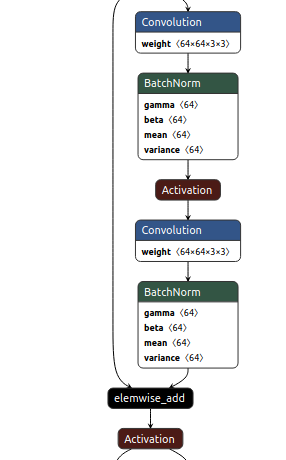

In [9]:
from IPython.display import Image
Image(filename='imgs/resnet18_v1_block1_mxnet.png') 

## Properties

  - This block has 2 branches
    - First branch is the identity branch, it takes the input and pushes it as the output, the Residual
    - Second branch has these layers
        - conv_3x3 -> batchnorm -> relu -> conv_3x3 -> batchnorm
        
  - The branches are added elementwise, so both the branches need to have same sized output
  
  - The final layer to this block is relu

## resnet block - 2
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

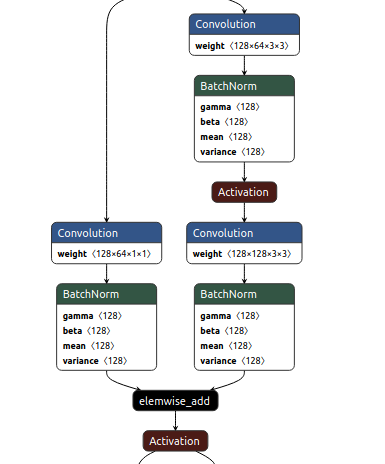

In [10]:
from IPython.display import Image
Image(filename='imgs/resnet18_v1_block2_mxnet.png') 

## Properties

  - This block has 2 branches
    - First branch has these layers
        - conv_1x1 ->batchnorm
    - Second branch has these layers
        - conv_3x3 -> batchnorm -> relu -> conv_3x3 -> batchnorm
        
  - The branches are added elementwise, so both the branches need to have same sized output
  
  - The final layer to this block is relu

## resnet fully connected chain

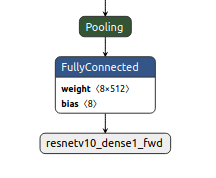

In [11]:
from IPython.display import Image
Image(filename='imgs/resnet18_v1_block_fc_mxnet.png') 

## resnet Network

  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

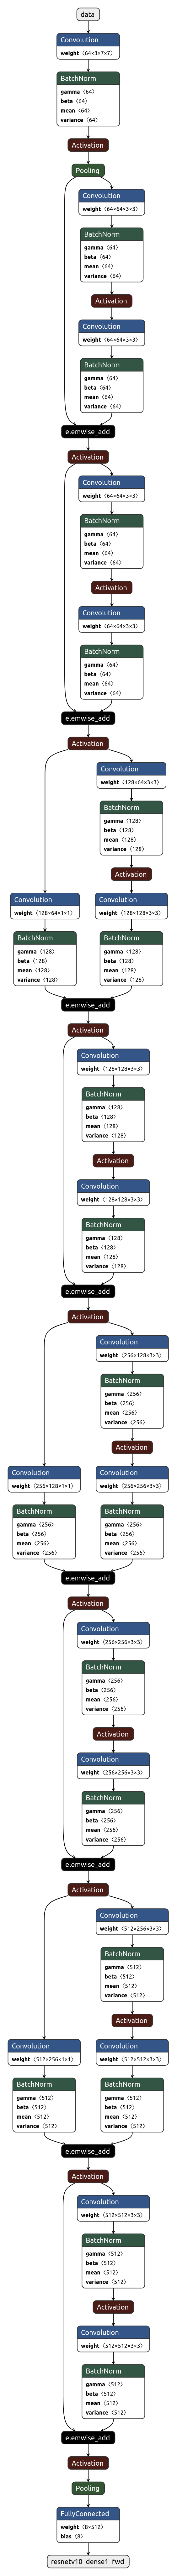

In [12]:
from IPython.display import Image
Image(filename='imgs/resnet18_v1_mxnet.png') 

## Properties

  - This network 
    - has 5 type-1 blocks
    - has 3 type-2 blocks
    - post these blocks the type-3 (fc) block exists


<a id='3'></a>
# Train the classifier

In [13]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.896, Train-loss: 0.324 | Val-acc: 0.952657, Val-loss: 0.174, | time: 32.0 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.953, Train-loss: 0.157 | Val-acc: 0.957488, Val-loss: 0.137, | time: 31.9 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.971, Train-loss: 0.105 | Val-acc: 0.964251, Val-loss: 0.136, | time: 31.1 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.980, Train-loss: 0.066 | Val-acc: 0.974396, Val-loss: 0.092, | time: 31.9 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.988, Train-loss: 0.045 | Val-acc: 0.978744, Val-loss: 0.093, | time: 31.6 sec

    Training completed in: 2m 38s
    Best val Acc:          0.978744

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Project/resnet-intro/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Project/resnet-intro/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   

<Figure size 432x288 with 0 Axes>

<a id='4'></a>
# Run inference on trained classifier

In [14]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "resnet-intro", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Project/resnet-intro/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Project
    Experiment: resnet-intro
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Project/resnet-intro/



Prediction
    Image name:         natural-images/test/test1.jpg
    Predicted class:      airplane
    Predicted score:      13.71891975402832



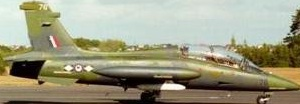

In [15]:
output = gtf.Infer(img_name = "natural-images/test/test1.jpg");
from IPython.display import Image
Image(filename='natural-images/test/test1.jpg') 

Prediction
    Image name:         natural-images/test/test2.jpg
    Predicted class:      cat
    Predicted score:      12.55334758758545



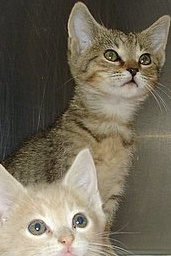

In [16]:
output = gtf.Infer(img_name = "natural-images/test/test2.jpg");
from IPython.display import Image
Image(filename='natural-images/test/test2.jpg') 

Prediction
    Image name:         natural-images/test/test3.jpg
    Predicted class:      fruit
    Predicted score:      16.153820037841797



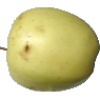

In [17]:
output = gtf.Infer(img_name = "natural-images/test/test3.jpg");
from IPython.display import Image
Image(filename='natural-images/test/test3.jpg') 